In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fdir = '/Users/cosmology/radiometer/ReadoutApp/observation/'

In [93]:
import glob
from scipy.optimize import curve_fit

In [4]:
fnames = glob.glob(fdir+'*.txt')

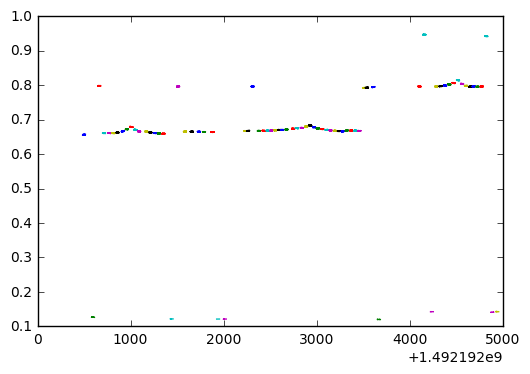

In [62]:
for f in fnames:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [15]:
RUN1 = []
PADDLE1 = []
NITRO1 = []
for f in fnames[:25]:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg <0.5:
        PADDLE1.append(f)
    elif avg < 0.72:
        RUN1.append(f)
    else:
        NITRO1.append(f)

In [21]:
RUN2 = []
PADDLE2 = []
NITRO2 = []
for f in fnames[25:-18]:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg <0.5:
        PADDLE2.append(f)
    elif avg < 0.72:
        RUN2.append(f)
    else:
        NITRO2.append(f)

In [23]:
RUN3 = []
PADDLE3 = []
NITRO3 = []
for f in fnames[-18:]:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg <0.5:
        PADDLE3.append(f)
    elif avg < 0.82:
        RUN3.append(f)
    else:
        NITRO3.append(f)

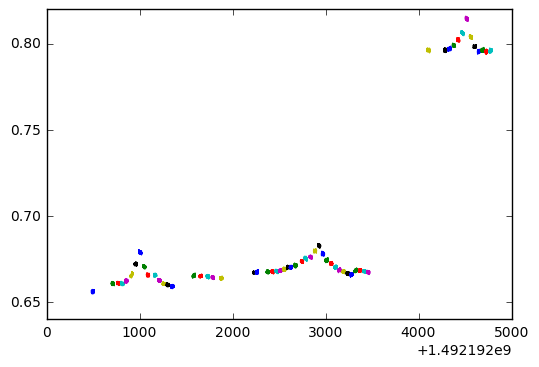

In [30]:
for f in np.concatenate((RUN1,RUN2,RUN3)):
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])


In [78]:
angles1 = []
for f in RUN1:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            x = fl.readline()
            angles1.append(float(x.split(': ')[1].split('\n')[0])* np.pi / 180)

In [79]:
angles2 = []
for f in RUN2:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            x = fl.readline()
            angles2.append(float(x.split(': ')[1].split('\n')[0])* np.pi / 180)

In [80]:
angles3 = []
for f in RUN3:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            x = fl.readline()
            angles3.append(float(x.split(': ')[1].split('\n')[0])* np.pi / 180)

In [81]:
meanRUN1 = []
stddevRUN1 = []
for f in RUN1:
    x = np.loadtxt(f)
    meanRUN1.append(np.mean(x[:,1]))
    stddevRUN1.append(np.std(x[:,1]))

In [82]:
meanRUN2 = []
stddevRUN2 = []
for f in RUN2:
    x = np.loadtxt(f)
    meanRUN2.append(np.mean(x[:,1]))
    stddevRUN2.append(np.std(x[:,1]))

In [83]:
meanRUN3 = []
stddevRUN3 = []
for f in RUN3:
    x = np.loadtxt(f)
    meanRUN3.append(np.mean(x[:,1]))
    stddevRUN3.append(np.std(x[:,1]))

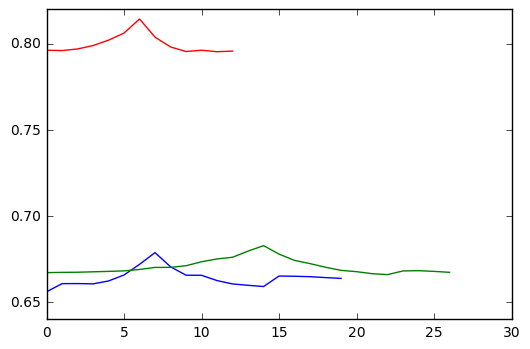

In [84]:
plot (meanRUN1)
plot (meanRUN2)
plot (meanRUN3)

<Container object of 3 artists>

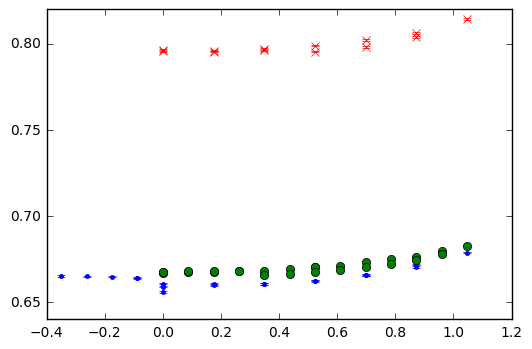

In [86]:
errorbar(angles1, meanRUN1, yerr=stddevRUN1, fmt='.')
errorbar(angles2, meanRUN2, yerr=stddevRUN2, fmt='o')
errorbar(angles3, meanRUN3, yerr=stddevRUN3, fmt='x')
#Shit is weird, fam.
#angles meet back up at origin

<Container object of 3 artists>

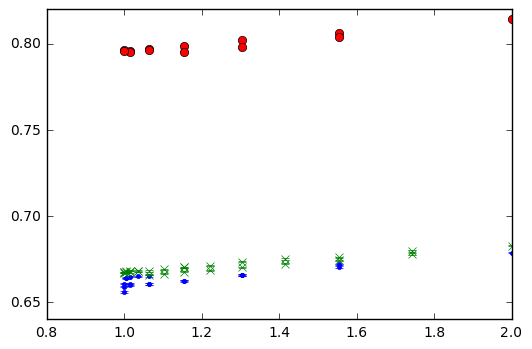

In [91]:
errorbar(1./np.cos(angles1), meanRUN1, yerr=stddevRUN1 ,fmt='.')
errorbar(1./np.cos(angles2), meanRUN2, yerr=stddevRUN2 ,fmt='x')
errorbar(1./np.cos(angles3), meanRUN3, yerr=stddevRUN3 ,fmt='o')

In [92]:
def line(x, m, b):
    return m*x + b

In [95]:
x1 = 1./np.cos(angles1)
y1 = np.array(meanRUN1)

x2 = 1./np.cos(angles2)
y2 = np.array(meanRUN2)

x3 = 1./np.cos(angles3)
y3 = np.array(meanRUN3)

In [98]:
popt1 = curve_fit(line, x1, y1, sigma=stddevRUN1, absolute_sigma=True)
popt2 = curve_fit(line, x2, y2, sigma=stddevRUN2, absolute_sigma=True)
popt3 = curve_fit(line, x3, y3, sigma=stddevRUN3, absolute_sigma=True)

In [100]:
m1 = popt1[0][0]
b1 = popt1[0][1]

merr1= sqrt(popt1[1][0,0])
berr1= sqrt(popt1[1][1,1])

m2 = popt2[0][0]
b2 = popt2[0][1]

merr2= sqrt(popt2[1][0,0])
berr2= sqrt(popt2[1][1,1])

m3 = popt3[0][0]
b3 = popt3[0][1]

merr3= sqrt(popt3[1][0,0])
berr3= sqrt(popt3[1][1,1])

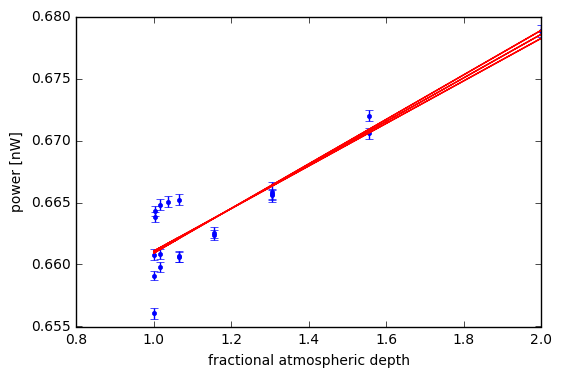

In [108]:
errorbar(x1, y1, yerr=stddevRUN1,fmt='.')
plot(x1, line(x1, m1,b1), 'r')
plot(x1, line(x1, m1+merr1,b1-berr1), 'r')
plot(x1, line(x1, m1-merr1,b1+berr1), 'r')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

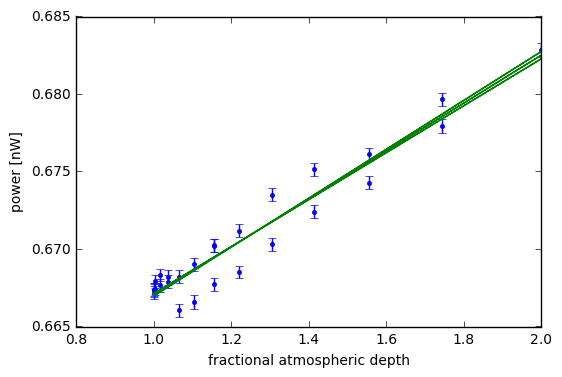

In [107]:
errorbar(x2, y2, yerr=stddevRUN2,fmt='.')
plot(x2, line(x2, m2,b2), 'g')
plot(x2, line(x2, m2+merr2,b2-berr2), 'g')
plot(x2, line(x2, m2-merr2,b2+berr2), 'g')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

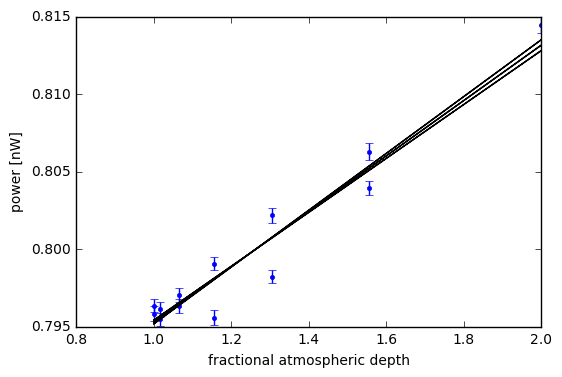

In [105]:
errorbar(x3, y3, yerr=stddevRUN3,fmt='.')
plot(x3, line(x3, m3,b3), 'k')
plot(x3, line(x3, m3+merr3,b3-berr3), 'k')
plot(x3, line(x3, m3-merr3,b3+berr3), 'k')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

In [113]:
Npower1 = []
Nerr1 = []
for f in NITRO1:
    x = np.loadtxt(f)
    Npower1.append(np.mean(x[:,1]))
    Nerr1.append(np.std(x[:,1]))
    
Npower2 = []
Nerr2 = []
for f in NITRO2:
    x = np.loadtxt(f)
    Npower2.append(np.mean(x[:,1]))
    Nerr2.append(np.std(x[:,1]))
    
Npower3 = []
Nerr3 = []
for f in NITRO3:
    x = np.loadtxt(f)
    Npower3.append(np.mean(x[:,1]))
    Nerr3.append(np.std(x[:,1]))

In [125]:
Ppower1 = []
Ptemp1 = []
Perr1 = []
Terr1 = []
for f in PADDLE1:
    x = np.loadtxt(f)
    Ppower1.append(np.mean(x[:,1])*10)
    Ptemp1.append(np.mean(x[:,2]))
    Perr1.append(np.std(x[:,1]*10))
    Terr1.append(np.std(x[:,2]))

Ppower2 = []
Ptemp2 = []
Perr2 = []
Terr2 = []
for f in PADDLE2:
    x = np.loadtxt(f)
    Ppower2.append(np.mean(x[:,1])*10)
    Ptemp2.append(np.mean(x[:,2]))
    Perr2.append(np.std(x[:,1]*10))
    Terr2.append(np.std(x[:,2]))
    
Ppower3 = []
Ptemp3 = []
Perr3 = []
Terr3 = []
for f in PADDLE3:
    x = np.loadtxt(f)
    Ppower3.append(np.mean(x[:,1])*10)
    Ptemp3.append(np.mean(x[:,2]))
    Perr3.append(np.std(x[:,1]*10))
    Terr3.append(np.std(x[:,2]))

<Container object of 3 artists>

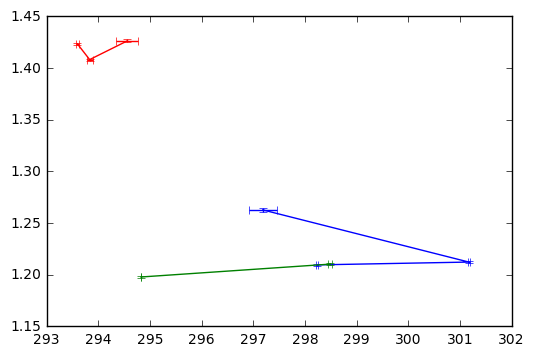

In [128]:
errorbar(Ptemp1, Ppower1, yerr=Perr1, xerr=Terr1)
errorbar(Ptemp2, Ppower2, yerr=Perr2, xerr=Terr2)
errorbar(Ptemp3, Ppower3, yerr=Perr3, xerr=Terr3)

#3rd Blue Point sucks, but it's even worse when removed ¯\_(ツ)_/¯ 
#idk what's up with the red one (diff polarization)
#Add 1 kelvin error

<Container object of 3 artists>

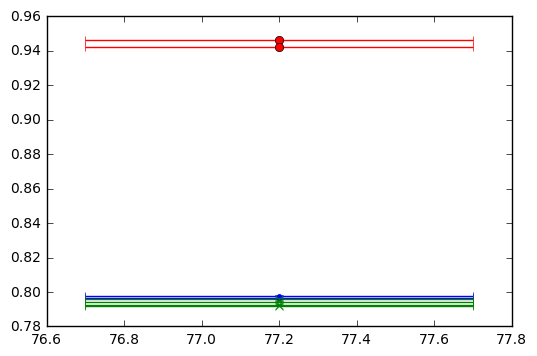

In [136]:
errorbar(77.2*np.ones(len(Npower1)), Npower1, yerr=Nerr1 ,xerr=.5*np.ones(len(Npower1)), fmt='.')
errorbar(77.2*np.ones(len(Npower2)), Npower2, yerr=Nerr2 ,xerr=.5*np.ones(len(Npower2)), fmt='x')
errorbar(77.2*np.ones(len(Npower3)), Npower3, yerr=Nerr3 ,xerr=.5*np.ones(len(Npower3)), fmt='o')

#Take new error from the gain fluctuation
#Maybe divide power data by creatd line to negate gain drift
#Check if gain fluc is a f(t) or if it's random

In [142]:
xc1 = np.concatenate([77.2*np.ones(len(Npower1)), Ptemp1])
yc1 = np.concatenate([Npower1, Ppower1])

xc2 = np.concatenate([77.2*np.ones(len(Npower2)), Ptemp2])
yc2 = np.concatenate([Npower2, Ppower2])

xc3 = np.concatenate([77.2*np.ones(len(Npower3)), Ptemp3])
yc3 = np.concatenate([Npower3, Ppower3])

In [146]:
Calib1 = curve_fit(line, yc1, xc1, sigma = (.5*np.ones(len(xc1))), absolute_sigma=True)
Calib2 = curve_fit(line, yc2, xc2, sigma = (.5*np.ones(len(xc2))), absolute_sigma=True)
Calib3 = curve_fit(line, yc3, xc3, sigma = (.5*np.ones(len(xc3))), absolute_sigma=True)


In [147]:
print Calib1
print Calib2
print Calib3

(array([ 509.73088782, -327.96835352]), array([[ 1.11213376, -1.17417798],
       [-1.17417798,  1.28968354]]))
(array([ 534.77508505, -347.28331015]), array([[ 1.11337018, -1.03604972],
       [-1.03604972,  1.00576561]]))
(array([ 456.17907447, -353.5278892 ]), array([[ 0.9230059 , -1.13470384],
       [-1.13470384,  1.4449562 ]]))


In [154]:
print line(b1, *Calib1[0])
print line(b2, *Calib2[0])
print line(b3, *Calib3[0])


0.0153250638105
1.17630481781
1.11901124656


In [156]:
Gerr1= sqrt(Calib1[1][0,0])
Terr1= sqrt(Calib1[1][1,1])

Gerr2= sqrt(Calib2[1][0,0])
Terr2= sqrt(Calib2[1][1,1])

Gerr3= sqrt(Calib3[1][0,0])
Terr3= sqrt(Calib3[1][1,1])

In [160]:
Perr1 = sqrt((b1*(Calib1[0][0])*sqrt((berr1/b1)**2+(Gerr1/Calib1[0][0])**2))**2+Terr1**2)
Perr2 = sqrt((b2*(Calib2[0][0])*sqrt((berr2/b2)**2+(Gerr2/Calib2[0][0])**2))**2+Terr2**2)
Perr3 = sqrt((b3*(Calib3[0][0])*sqrt((berr3/b3)**2+(Gerr3/Calib3[0][0])**2))**2+Terr3**2)

In [161]:
print Perr1
print Perr2
print Perr3

1.34478518377
1.23423169879
1.44048279743
